# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [5]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\solse\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [7]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [8]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!

bitcoin_news_en = newsapi.get_everything(q="Bitcoin",language="en")


In [9]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_news_en = newsapi.get_everything(q="Ethereum",language="en")

In [11]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text,
            "date": date,
         })
        
    except AttributeError:
        pass

In [14]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)


In [15]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.053840,0.034500,0.017000,0.948500
std,0.308653,0.058044,0.031057,0.055668
min,-0.401900,0.000000,0.000000,0.842000
25%,-0.025675,0.000000,0.000000,0.915250
50%,0.000000,0.000000,0.000000,0.957000
75%,0.215175,0.057000,0.010750,1.000000
max,0.526700,0.158000,0.080000,1.000000


In [16]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.156770,0.067600,0.031650,0.900650
std,0.332715,0.065044,0.042331,0.077973
min,-0.584900,0.000000,0.000000,0.729000
25%,-0.010450,0.000000,0.000000,0.844000
50%,0.102600,0.070000,0.000000,0.910500
75%,0.386825,0.102000,0.065250,0.955500
max,0.778300,0.216000,0.115000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [18]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [21]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# set stop words
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'ha', 'char','also', 'reutersdado'}

In [25]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text

   
    # Create a tokenized list of the words
    
    
    # Lemmatize words into root words

   
    # Convert the words to lowercase
    
    
    # Remove the stop words
def tokenizer(text):
    """Tokenizes text."""
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return tokens
    
  

In [26]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,compound,positive,negative,neutral,text,date,tokens
0,-0.4019,0.000,0.078,0.922,"Image source, AFP via Getty Images\r\nImage ca...",2021-12-12,"[image, source, afp, via, getty, imagesimage, ..."
1,0.0000,0.000,0.000,1.000,The plant opening northeast of Niagara Falls t...,2021-12-06,"[plant, opening, northeast, niagara, falls, mo..."
2,0.5106,0.099,0.000,0.901,"Earlier this year, Nothing released a pair of ...",2021-12-01,"[earlier, year, nothing, released, pair, relat..."
3,0.0000,0.000,0.000,1.000,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...",2021-11-22,"[mizata, el, salvadorlondon, nov, reuters, el,..."
4,0.4767,0.136,0.000,0.864,Posted \r\nAfter becoming the first country to...,2021-11-22,"[posted, becoming, first, country, accept, cry..."


In [27]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,"If you claim ownership, someone will probably ...",2021-11-19,0.7783,0.216,0.000,0.784,"[claim, ownership, someone, probably, want, ta..."
1,More than $1.2 million has already been spent ...,2021-11-24,0.0000,0.000,0.000,1.000,"[million, already, spent, gas, feesone, remain..."
2,Ethereum has been on a tear this year. Its out...,2021-11-23,0.6542,0.178,0.000,0.822,"[ethereum, tear, year, outperformed, bitcoin, ..."
3,Blockchain startup MonoX Finance said on Wedne...,2021-12-02,-0.0516,0.074,0.079,0.847,"[blockchain, startup, monox, finance, wednesda..."
4,"On Monday, Budweiser joined the non-fungible t...",2021-11-30,-0.1531,0.000,0.045,0.955,"[monday, budweiser, joined, nonfungible, token..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [28]:
from collections import Counter
from nltk import ngrams

In [29]:
def get_token(df):
    tokens = []
    for i in df['tokens']:
        tokens.extend(i)
    return tokens

btc_tokens = get_token(bitcoin_df)
eth_tokens = get_token(ethereum_df)

In [30]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
def bigram_counter(tokens, N):
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

bigram_btc = bigram_counter(btc_tokens, 2)
bigram_btc

{('image', 'source'): 1,
 ('source', 'afp'): 1,
 ('afp', 'via'): 1,
 ('via', 'getty'): 1,
 ('getty', 'imagesimage'): 1,
 ('imagesimage', 'caption'): 1,
 ('caption', 'modi'): 1,
 ('modi', 'million'): 1,
 ('million', 'twitter'): 1,
 ('twitter', 'followersindian'): 1,
 ('followersindian', 'prime'): 1,
 ('prime', 'minister'): 2,
 ('minister', 'narendra'): 2,
 ('narendra', 'modis'): 2,
 ('modis', 'twitter'): 2,
 ('twitter', 'account'): 3,
 ('account', 'wa'): 1,
 ('wa', 'hacked'): 1,
 ('hacked', 'message'): 1,
 ('message', 'saying'): 1,
 ('saying', 'india'): 1,
 ('india', 'plant'): 1,
 ('plant', 'opening'): 1,
 ('opening', 'northeast'): 1,
 ('northeast', 'niagara'): 1,
 ('niagara', 'falls'): 1,
 ('falls', 'month'): 1,
 ('month', 'somerset'): 1,
 ('somerset', 'ny'): 1,
 ('ny', 'part'): 1,
 ('part', 'million'): 1,
 ('million', 'project'): 1,
 ('project', 'terawulf'): 1,
 ('terawulf', 'bitcoin'): 1,
 ('bitcoin', 'mining'): 1,
 ('mining', 'company'): 1,
 ('company', 'project'): 1,
 ('project', '

In [31]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
bigram_eth = bigram_counter(eth_tokens, 2)
bigram_eth

{('claim', 'ownership'): 1,
 ('ownership', 'someone'): 1,
 ('someone', 'probably'): 1,
 ('probably', 'want'): 1,
 ('want', 'take'): 1,
 ('take', 'itin'): 1,
 ('itin', 'may'): 1,
 ('may', 'one'): 1,
 ('one', 'better'): 1,
 ('better', 'piece'): 1,
 ('piece', 'performance'): 1,
 ('performance', 'art'): 1,
 ('art', 'year'): 1,
 ('year', 'australian'): 1,
 ('australian', 'geoffrey'): 1,
 ('geoffrey', 'huntley'): 1,
 ('huntley', 'created'): 1,
 ('created', 'website'): 1,
 ('website', 'promise'): 1,
 ('promise', 'million'): 1,
 ('million', 'already'): 1,
 ('already', 'spent'): 1,
 ('spent', 'gas'): 1,
 ('gas', 'feesone'): 1,
 ('feesone', 'remaining'): 1,
 ('remaining', 'copy'): 1,
 ('copy', 'official'): 1,
 ('official', 'edition'): 1,
 ('edition', 'constitutionimage'): 1,
 ('constitutionimage', 'sothebysas'): 1,
 ('sothebysas', 'last'): 1,
 ('last', 'thursday'): 1,
 ('thursday', 'night'): 1,
 ('night', 'constitutiondao'): 1,
 ('constitutiondao', 'ethereum'): 1,
 ('ethereum', 'tear'): 1,
 ('te

In [32]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [33]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(btc_tokens, 10)

[('bitcoin', 17),
 ('world', 7),
 ('cryptocurrency', 7),
 ('reuters', 6),
 ('posted', 6),
 ('first', 5),
 ('twitter', 4),
 ('company', 4),
 ('el', 4),
 ('billion', 4)]

In [34]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(eth_tokens, 10)

[('year', 6),
 ('bitcoin', 6),
 ('million', 3),
 ('copy', 3),
 ('ethereum', 3),
 ('finance', 3),
 ('us', 3),
 ('digital', 3),
 ('ear', 3),
 ('earbuds', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

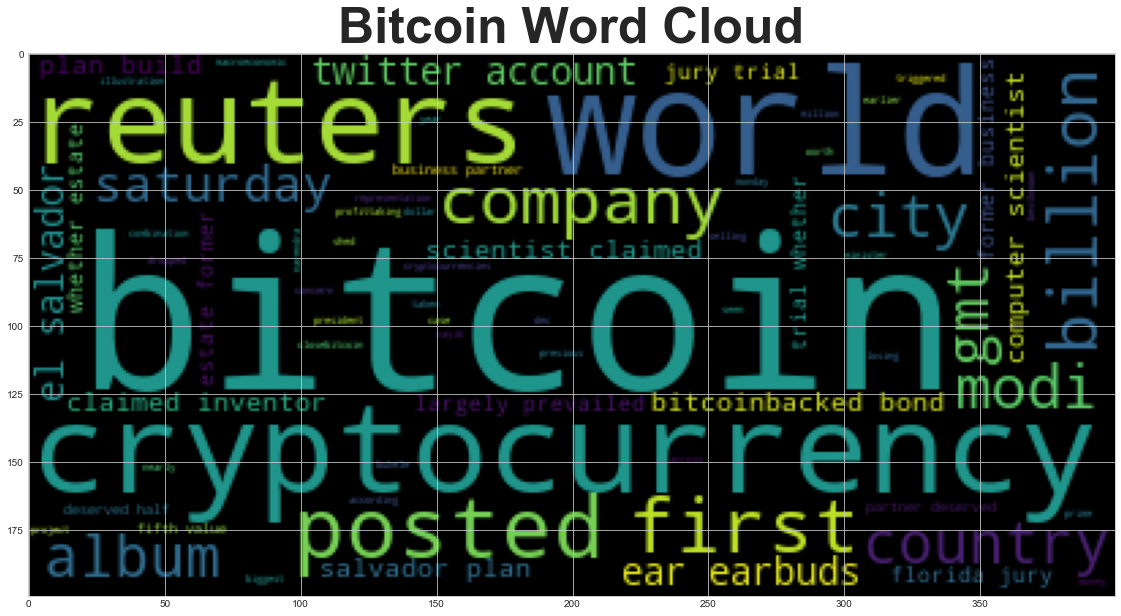

In [36]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wc = WordCloud().generate(' '.join(btc_tokens))
plt.title("Bitcoin Word Cloud", fontsize = 50, fontweight = 'bold')
plt.imshow(wc)


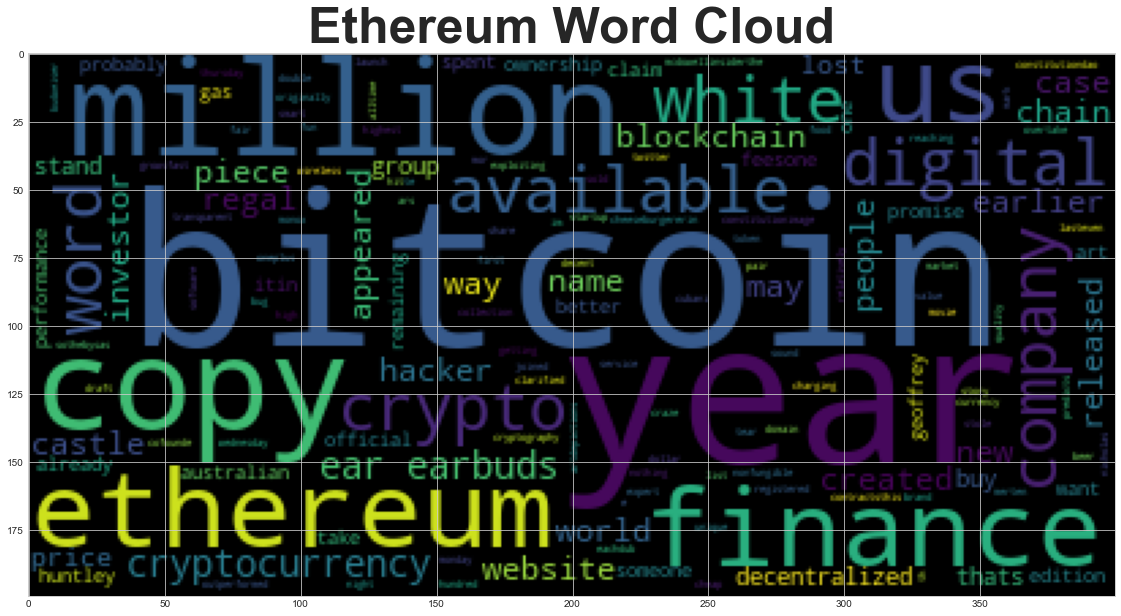

In [37]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc = WordCloud().generate(' '.join(eth_tokens))
plt.title("Ethereum Word Cloud", fontsize = 50, fontweight = 'bold')
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [41]:
import spacy
from spacy import displacy

In [42]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm


In [51]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [52]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_content = ' '.join(bitcoin_df['text'])
btc_content

'Image source, AFP via Getty Images\r\nImage caption, Modi has has more than 70 million Twitter followers\r\nIndian Prime Minister Narendra Modi\'s Twitter account was hacked with a message saying India ha… [+854 chars] The plant opening northeast of Niagara Falls this month, in Somerset, N.Y., is part of a $550 million project by Terawulf, a Bitcoin mining company. The project also includes a proposed 150-megawatt … [+1514 chars] Earlier this year, Nothing released a pair of relatively cheap $99 Ear 1 earbuds with a fun transparent case, wireless charging and decent sound quality. Now, the company (created by OnePlus cofounde… [+1395 chars] MIZATA, El Salvador/LONDON, Nov 22 (Reuters) - El Salvador plans to build the world\'s first "Bitcoin City" with money from a $1 billion bitcoin-backed bond the country\'s President Nayib Bukele said o… [+3147 chars] Posted \r\nAfter becoming the first country to accept the cryptocurrency as legal tender, El Salvador plans to build the world\'s fir

In [53]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(btc_content)

# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "BITCOIN NER"

In [54]:
# Render the visualization
# YOUR CODE HERE!
doc.user_data["title"] = "BITCOIN NER"


In [55]:
# List all Entities
# YOUR CODE HERE!
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

AFP ORG
Getty Images ORG
Modi GPE
more than 70 million MONEY
Twitter PRODUCT
Indian NORP
Narendra Modi's PERSON
Twitter PRODUCT
India GPE
Niagara Falls PERSON
this month DATE
Somerset GPE
N.Y. GPE
$550 million MONEY
Terawulf DATE
150-megawatt QUANTITY
Earlier this year DATE
99 MONEY
OnePlus ORG
El Salvador/ GPE
Reuters ORG
El Salvador GPE
first ORDINAL
Bitcoin City GPE
$1 billion MONEY
Nayib Bukele PERSON
first ORDINAL
El Salvador GPE
Bitcoin City GPE
Twitter PRODUCT
TechCrunch ORG
Indian NORP
Narendra Modi's PERSON
Twitter PRODUCT
+1087 CARDINAL
November 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationDec PERSON
12 CARDINAL
Reuters ORG
Sunday DATE
above $50,000 MONEY
99 MONEY
December 13th DATE
The Ear 1 WORK_OF_ART
Nothings Ear 1 PERSON
earlier this year DATE
Reuters ORG
Monday DATE
Florida GPE
half CARDINAL
Spotify ORG
Adele PERSON
30 CARDINAL
+3186 ORG
Australian Baseball League ORG
Perth Heat PERSON
first ORDINAL
Hea PERSON
Dec 4 DATE
Reuters ORG
8.4% PERCENT
49,228.82 MONEY
20:0

---

### Ethereum NER

In [56]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

eth_content = ' '.join(ethereum_df['text'])
eth_content

'If you claim ownership, someone will probably want to take it\r\nIn what may be one of the better pieces of performance art this year, Australian Geoffrey Huntley has created a website that promises to… [+4542 chars] More than $1.2 million has already been spent on gas fees\r\nOne of 13 remaining copies of the Official Edition of the Constitution.\r\nImage: Sothebys\r\nAs of last Thursday night, ConstitutionDAO found i… [+5262 chars] Ethereum has been on a tear this year. Its outperformed bitcoin this year and has hit an all-time high. Ethereum has even won over people like Mark Cuban.\r\nI have my fair share of bitcoin, but Im mor… [+10978 chars] Blockchain startup MonoX Finance said on Wednesday that a hacker stole $31 million by exploiting a bug in software the service uses to draft smart contracts.\r\nThis story originally appeared on Ars Te… [+4372 chars] On Monday, Budweiser joined the non-fungible token craze with the launch of its first collection of unique pieces of digital a

In [57]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

doc = nlp(eth_content)
# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "Ethereum NER"

In [58]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [59]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

this year DATE
Australian Geoffrey Huntley PERSON
More than $1.2 million MONEY
One CARDINAL
13 CARDINAL
the Official Edition of the WORK_OF_ART
Constitution LAW
Sothebys GPE
last Thursday TIME
night TIME
ConstitutionDAO PERSON
this year DATE
this year DATE
Mark Cuban PERSON
Wednesday DATE
$31 million MONEY
Ars Te ORG
Monday DATE
Budweiser ORG
first ORDINAL
hundreds of dollars MONEY
Earlier this year DATE
99 MONEY
OnePlus ORG
Erin McDowell/Insider PERSON
White Castle FAC
Twitter PRODUCT
Nicholas Merten PERSON
May 2018 DATE
Shutterstock ORG
Regal Cinemas PERSON
more than 500 CARDINAL
dozens CARDINAL
Google ORG
Search GPE
2021 DATE
Squid Game ORG
year-long DATE
Xboxs ORG
Halo Infinite ORG
MicroStrategy ORG
Michael SaylorJoe Raedle/Getty Images PERSON
ETF ORG
99 MONEY
December 13th DATE
The Ear 1 WORK_OF_ART
Nothings Ear 1 PERSON
earlier this year DATE
less than two weeks DATE
DeFi GPE
Ethereum ORG
DeFi GPE
The U.S. Captioning Company ORG
the British Institute of Verbatim Reporters ORG
Get

---